# Steam Recommender System

Julia Tsaltas / Aug 2021

Data from Kaggle: https://www.kaggle.com/tamber/steam-video-games

Can compare with MetaCritic Scores for Games: https://www.kaggle.com/skateddu/metacritic-games-stats-20112019

## Part 1: Data Clean and EDA

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read csv file
steam = pd.read_csv('datasets/steam-200k.csv')

In [6]:
steam.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [7]:
# Check '0' column
steam['0'].value_counts()

0    199999
Name: 0, dtype: int64

In [8]:
# Remove '0' column
steam.drop(columns='0', inplace=True)

In [9]:
# Check for null values
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [10]:
# The column names are actually the features of the first player

In [11]:
# Shift index down one
steam.index = steam.index + 1  # shifting index

In [12]:
# Insert new row with columns variables
steam = steam.append(pd.DataFrame([steam.columns],index=[0],columns=steam.columns))
steam.sort_index(inplace=True) 

In [13]:
steam.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273
2,151603712,Fallout 4,purchase,1
3,151603712,Fallout 4,play,87
4,151603712,Spore,purchase,1


In [14]:
# Make first 1.0 item an int of 1
steam['1.0'][0] = 1

In [15]:
# Convert column 1.0 to floats bc some play times are floats
pd.to_numeric(steam['1.0'])

0           1.0
1         273.0
2           1.0
3          87.0
4           1.0
          ...  
199995      1.5
199996      1.0
199997      1.5
199998      1.0
199999      1.4
Name: 1.0, Length: 200000, dtype: float64

In [16]:
# Create a play column with values from '1.0' column

In [17]:
# Gather all play rows in new dataframe called play
play = pd.DataFrame(steam[steam['purchase'] == 'play'])
play.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273
3,151603712,Fallout 4,play,87
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [18]:
# Rename 1.0 column as 'play_time'
play.rename(columns={'1.0':'play_time'},inplace=True)

In [19]:
# Remove 'purchase' column
play.drop(columns='purchase', inplace=True)

In [20]:
# Reindex
play.reset_index(drop=True, inplace=True) 
play.head()

,151603712,The Elder Scrolls V Skyrim,play_time
0,151603712,The Elder Scrolls V Skyrim,273
1,151603712,Fallout 4,87
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9


In [21]:
# Gather all purchase rows in new dataframe called purchase
purchase = pd.DataFrame(steam[steam['purchase'] == 'purchase'])
purchase.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0
0,151603712,The Elder Scrolls V Skyrim,purchase,1
2,151603712,Fallout 4,purchase,1
4,151603712,Spore,purchase,1
6,151603712,Fallout New Vegas,purchase,1
8,151603712,Left 4 Dead 2,purchase,1


In [22]:
# Remove purchase column
purchase.drop(columns='purchase',inplace=True)

In [23]:
# Rename 1.0 column as 'purchase'
purchase.rename(columns={'1.0':'purchase'},inplace=True)

In [24]:
# Reindex
purchase.reset_index(drop=True, inplace=True) 
purchase.head()

,151603712,The Elder Scrolls V Skyrim,purchase
0,151603712,The Elder Scrolls V Skyrim,1
1,151603712,Fallout 4,1
2,151603712,Spore,1
3,151603712,Fallout New Vegas,1
4,151603712,Left 4 Dead 2,1


In [25]:
#Merge play and purchse dataframes into new steam dataframe
steam = purchase.merge(play)

In [26]:
# Change first two column names
steam = steam.rename(columns={"151603712":"user", "The Elder Scrolls V Skyrim":"game"})

In [27]:
steam.head(50)

,user,game,purchase,play_time
0,151603712,Fallout 4,1,87
1,151603712,Spore,1,14.9
2,151603712,Fallout New Vegas,1,12.1
3,151603712,Left 4 Dead 2,1,8.9
4,151603712,HuniePop,1,8.5
5,151603712,Path of Exile,1,8.1
6,151603712,Poly Bridge,1,7.5
7,151603712,Left 4 Dead,1,3.3
8,151603712,Team Fortress 2,1,2.8
9,151603712,Tomb Raider,1,2.5


User 187131847 was coerced by their friends to download Dota 2, played during a 2.3 hr session one evening, then never touched it again... don't blame them haha. jk jk :)

In [28]:
# Check values in purchase column
steam['purchase'].value_counts()

1.0    70784
Name: purchase, dtype: int64

All rows have a 1 value for purchase. Unpurchased games are not indicated, but are infered based on games not on user list.

In [29]:
# Check values for games
steam['game'].value_counts()

Dota 2                                  4841
Team Fortress 2                         2323
Counter-Strike Global Offensive         1377
Unturned                                1069
Left 4 Dead 2                            801
                                        ... 
Abandoned Chestnut Lodge Asylum            1
FATE Undiscovered Realms                   1
Nancy Drew Curse of Blackmoor Manor        1
NBA 2K11                                   1
Reverse Crawl                              1
Name: game, Length: 3600, dtype: int64

In [30]:
# Check how many different games are included in dataset
len(steam['game'].value_counts())

3600

In [31]:
# Check how many unique users are on list
len(steam['user'].unique())

11350

In [200]:
steam.to_csv('datasets/steam_clean.csv', index=False)

### Plot Most Purchased Games on Steam - Top 20

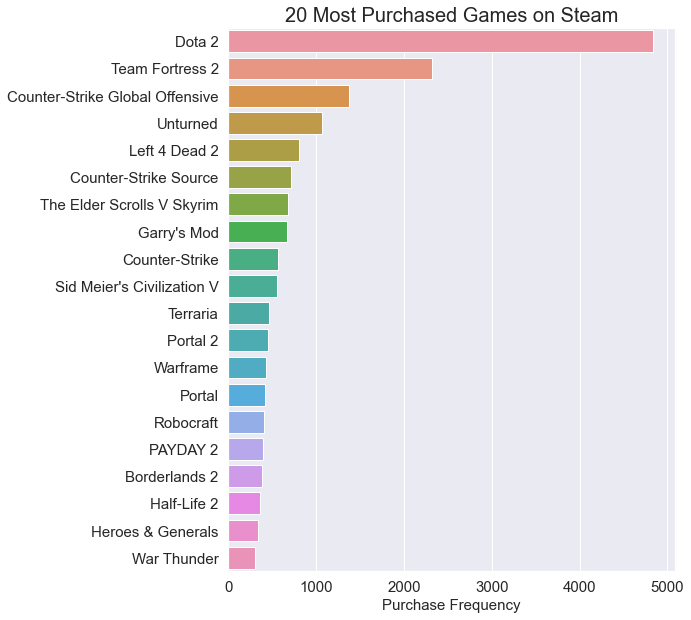

In [53]:
# Plot 20 most downloaded games
sns.set()
fig=plt.figure(figsize=(8, 10))
p = sns.countplot(y=steam['game'], order=pd.value_counts(steam['game']).iloc[:20].index);
p.set_xlabel("Purchase Frequency", fontsize = 15)
plt.xticks(fontsize=15)
p.set_ylabel('', fontsize = 15)
plt.yticks(fontsize=15)
p.set_title("20 Most Purchased Games on Steam", fontsize = 20)
#Saving the plot as an image
fig.savefig('images/top20_purchased.jpg', bbox_inches='tight', dpi=150);

### Plot Most Played Games on Steam - Top 20

In [45]:
# Games with longest cumulative play time
game_time = steam.drop(columns=['user','purchase']).groupby(['game']).sum().sort_values(by = 'play_time', ascending=False)
game_time.reset_index(inplace=True)
# Show top 20 only
game_time[:20]

,game,play_time
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3
5,Counter-Strike Source,96075.5
6,The Elder Scrolls V Skyrim,70616.3
7,Garry's Mod,49725.3
8,Call of Duty Modern Warfare 2 - Multiplayer,42009.9
9,Left 4 Dead 2,33596.7


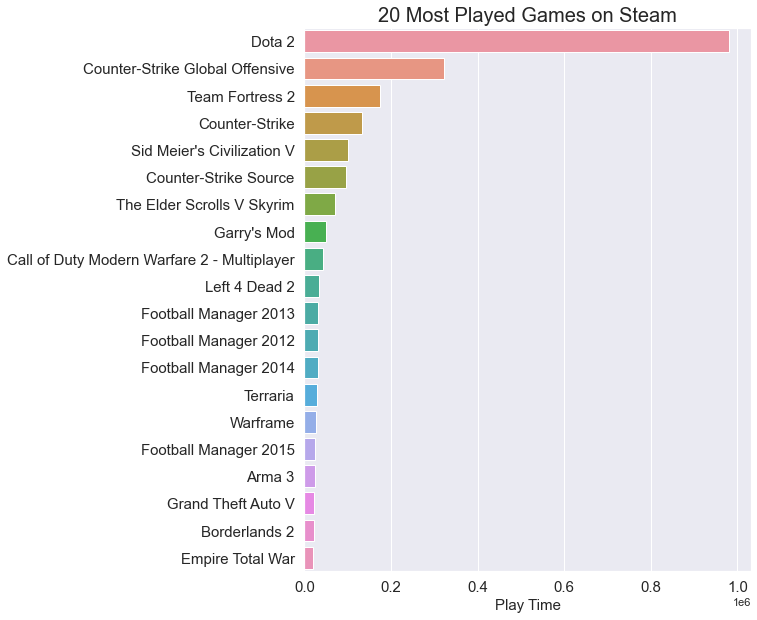

In [85]:
# Plot 20 most played games
sns.set()
fig=plt.figure(figsize=(8, 10))
p = sns.barplot(x=game_time['play_time'][:20] ,y=game_time['game'][:20])
p.set_xlabel("Play Time", fontsize = 15)
plt.xticks(fontsize=15)
p.set_ylabel('', fontsize = 15)
plt.yticks(fontsize=15)
p.set_title("20 Most Played Games on Steam", fontsize = 20);
#Saving the plot as an image
fig.savefig('images/top20_playtime.jpg', bbox_inches='tight', dpi=150);

Dota 2 has almost 1 million hours of play time cumulative of the players in this dataset. Wow!

In [ ]:
nb_top_games = 20
hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
top_played_games = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_top_games]

mask = df['Game'].isin(top_played_games['game'])

df_infos_user = df.loc[mask].loc[df['Action'] == 'play'][['Hours', 'Game']]


sns.set_style("whitegrid")
sns.boxplot(x="Hours", y="Game", data=df_infos_user, palette="Set3")

KeyboardInterrupt: 

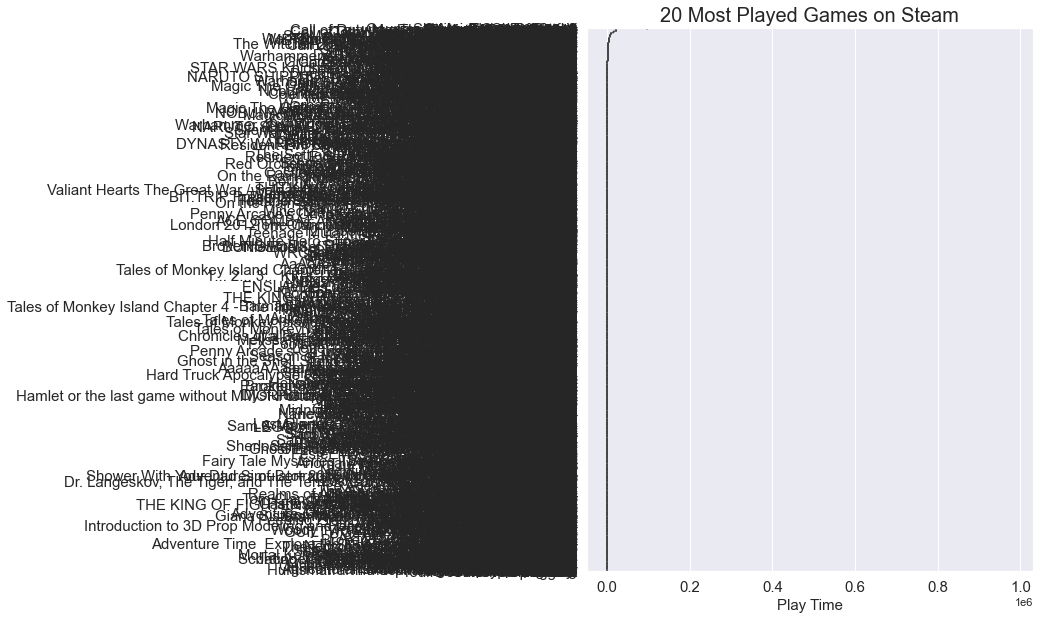

In [199]:
# Plot 20 most played games
sns.set()
fig=plt.figure(figsize=(8, 10))
sns.boxplot(x=game_time['play_time'],y=game_time['game'])
plt.xlabel("Play Time", fontsize = 15)
plt.xticks(fontsize=15)
plt.ylabel('', fontsize = 15)
plt.yticks(fontsize=15)
plt.title("20 Most Played Games on Steam", fontsize = 20);
#Saving the plot as an image
fig.savefig('images/top20_box_playtime.jpg', bbox_inches='tight', dpi=150);

### Distribution of Total Play Time per User

In [194]:
# Group by user to find out the distribution of play_time purchased

In [108]:
# Games with longest cumulative play time
user_time = steam.drop(columns=['purchase', 'game']).groupby(['user']).sum().sort_values(by = 'play_time', ascending=False)
user_time.reset_index(inplace=True)

,user,play_time
0,73017395,11754.0
1,10599862,11651.7
2,100630947,10853.2
3,26762388,10688.5
4,153382649,9640.0
5,43684632,9548.3
6,48798067,9427.2
7,52731290,9417.6
8,42935819,8172.9
9,14544587,8137.6


In [112]:
# Users with the highest play time
user_time[:10]

,user,play_time
0,73017395,11754.0
1,10599862,11651.7
2,100630947,10853.2
3,26762388,10688.5
4,153382649,9640.0
5,43684632,9548.3
6,48798067,9427.2
7,52731290,9417.6
8,42935819,8172.9
9,14544587,8137.6


In [113]:
# Users with the lowest play time
user_time[-10:]

,user,play_time
11340,190945239,0.1
11341,74859759,0.1
11342,33431754,0.1
11343,126233699,0.1
11344,185247516,0.1
11345,125950209,0.1
11346,90790453,0.1
11347,305993961,0.1
11348,74557142,0.1
11349,21580713,0.1


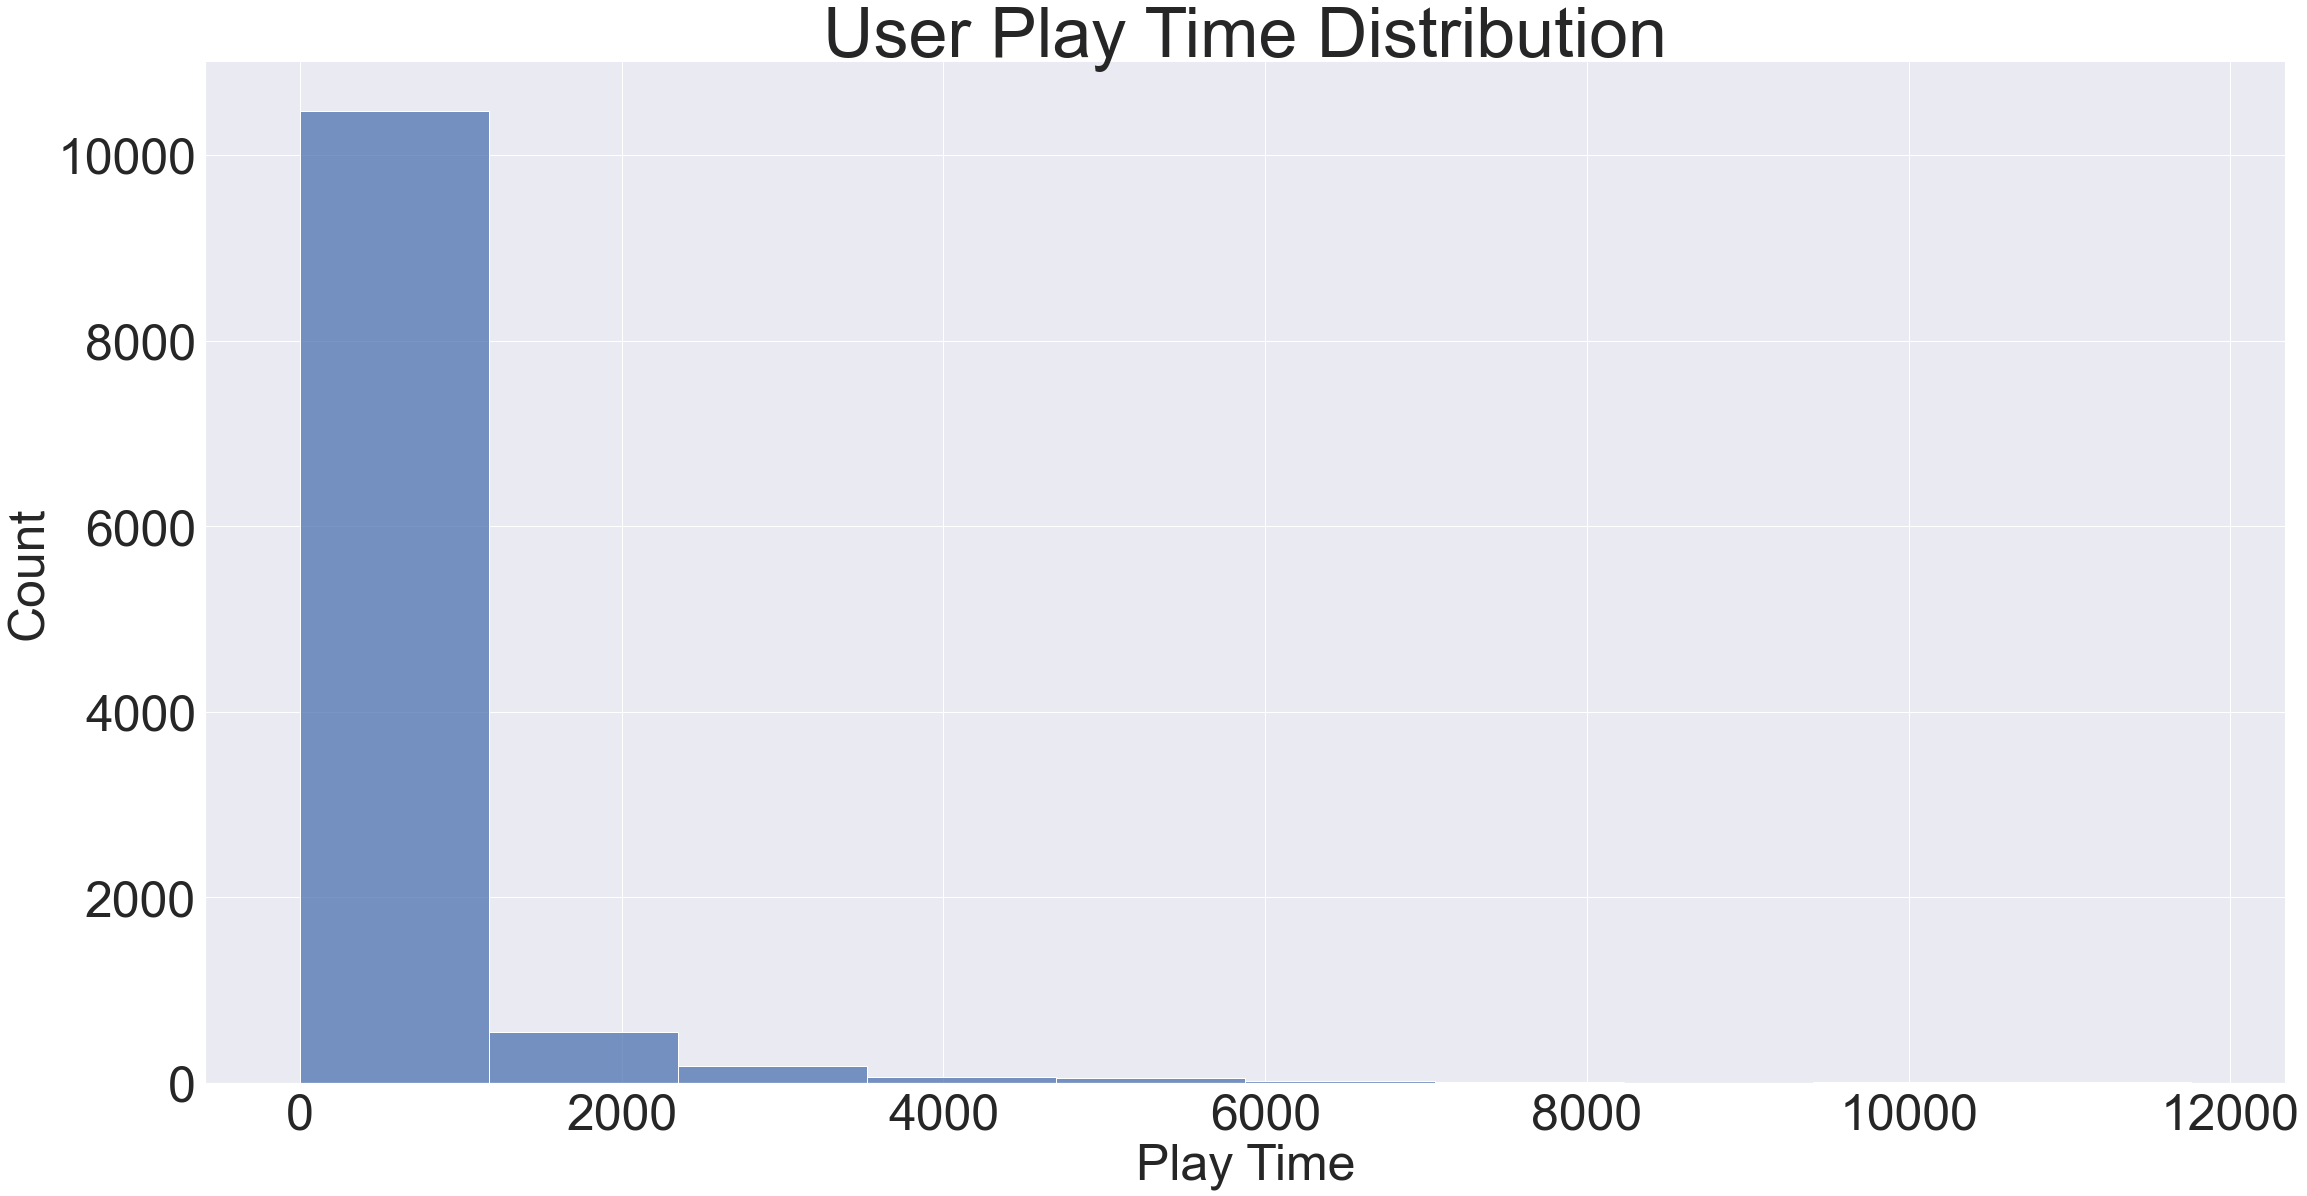

In [144]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=user_time, x='play_time',bins=10, height=15, aspect=2)
plt.xlabel("Play Time", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("User Play Time Distribution", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_usertime.jpg', bbox_inches='tight', dpi=150);

### Checking for User Play Time Outliers using Box Plot

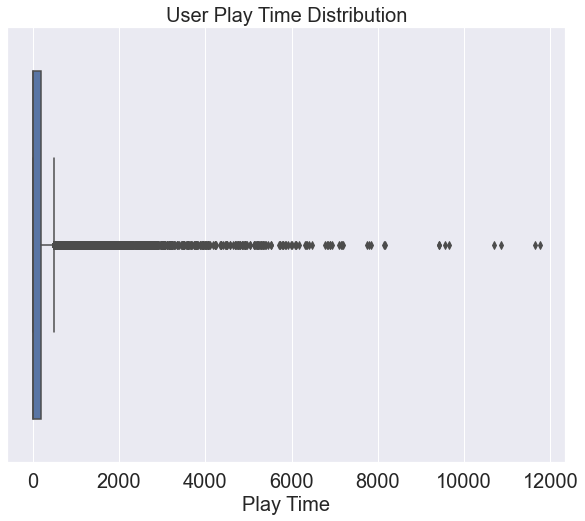

In [166]:
# Plot the distrubution 
sns.set()
fig=plt.figure(figsize=(10, 8))
sns.boxplot(data=user_time, x='play_time')
plt.xlabel("Play Time", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("User Play Time Distribution", fontsize = 20);

#Saving the plot as an image
fig.savefig('images/box_usertime.jpg', bbox_inches='tight', dpi=150);

### Play Time Statistics

In [103]:
# Check statistics of user total play time
user_time['play_time'].describe()

count    11350.000000
mean       304.137912
std        790.783105
min          0.100000
25%          2.300000
50%         19.550000
75%        198.975000
max      11754.000000
Name: play_time, dtype: float64

The distribution of cumulative game time for each user is very left skewed.

The average play time for users at 304hrs is well to the right of the median play time at 19hrs.

75% users have played less than 200hrs of total game time, while that top 25% that have played between a range of of 198 to 11754 hrs.

Splitting the distributions between the 3rd and 4th quartiles would help in further analyzing user play time for average users and high play time users.

### Distribution of Total Play Time per User (top 25%)

In [149]:
# Check the value at the 75% quartile
user_time.quantile(q=0.75)

user         2.177916e+08
play_time    1.989750e+02
log_time     5.293179e+00
Name: 0.75, dtype: float64

In [152]:
# Create dataframe of users with playtime in the top 25% of total playtime
top_users = user_time[user_time['play_time'] >= user_time['play_time'].quantile(q=0.75)]
top_users.head()

,user,play_time,log_time
0,73017395,11754.0,9.371949
1,10599862,11651.7,9.363207
2,100630947,10853.2,9.292215
3,26762388,10688.5,9.276924
4,153382649,9640.0,9.173676


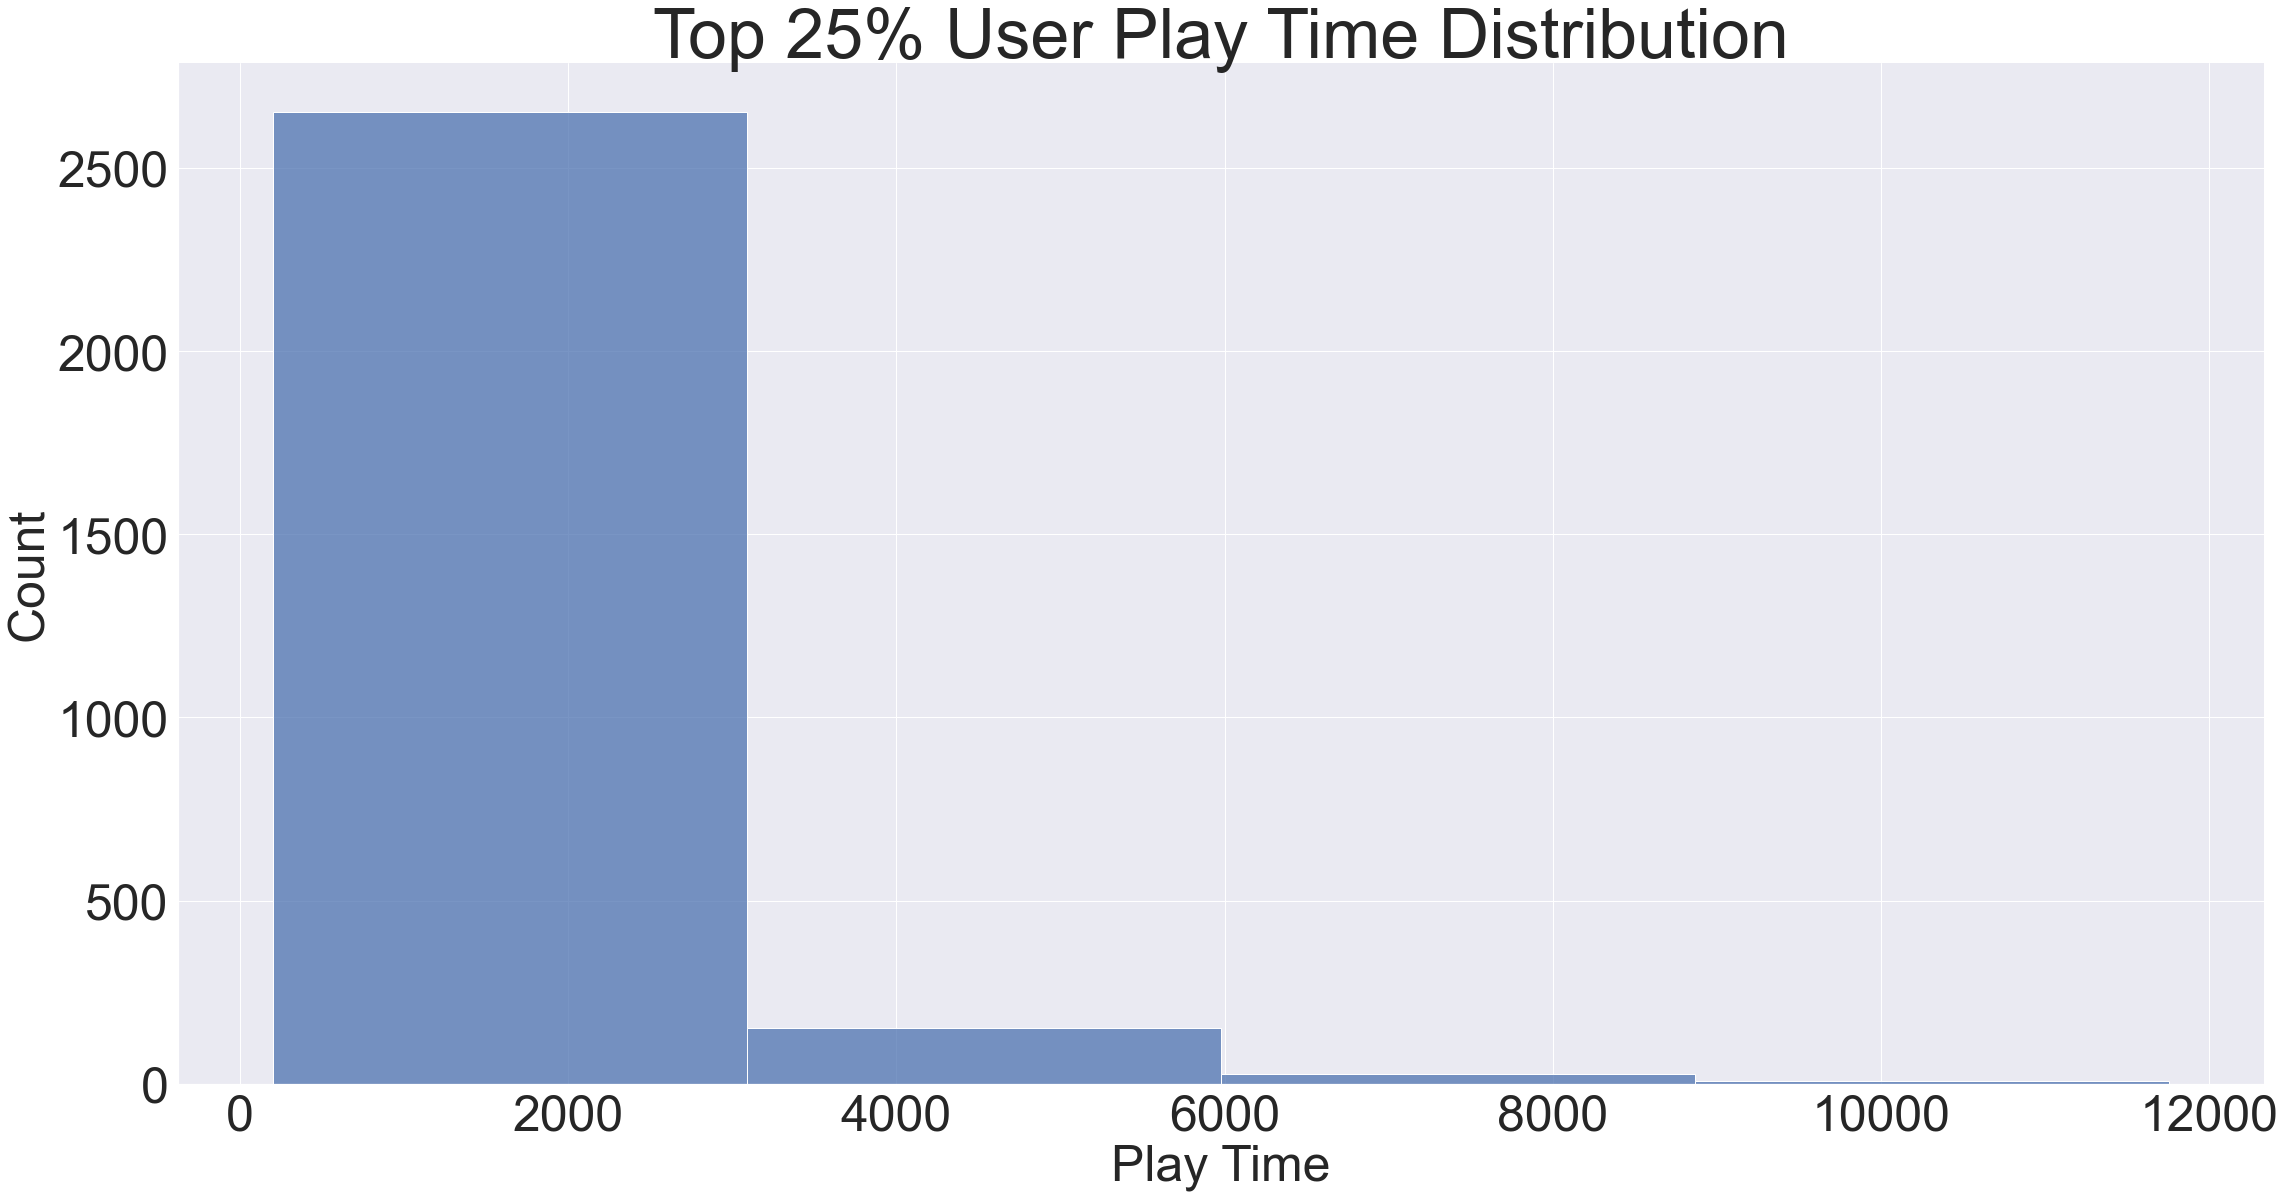

In [155]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=top_users, x='play_time',bins=4, height=15, aspect=2)
plt.xlabel("Play Time", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("Top 25% User Play Time Distribution", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_usertime_top.jpg', bbox_inches='tight', dpi=150);

In [157]:
# Review statistics for top users
top_users['play_time'].describe()

count     2838.000000
mean      1132.714905
std       1257.025197
min        199.000000
25%        367.025000
50%        683.250000
75%       1392.275000
max      11754.000000
Name: play_time, dtype: float64

### Distribution of Total Play Time per User (bottom 75%)

In [153]:
# Create dataframe for typical users in the bottom 75% of the playtime distribution
typ_users = user_time[user_time['play_time'] < user_time['play_time'].quantile(q=0.75)]
typ_users.head()

,user,play_time,log_time
2838,168732483,198.9,5.292802
2839,146762928,198.4,5.290285
2840,55522584,198.1,5.288772
2841,44147477,198.0,5.288267
2842,140086587,198.0,5.288267


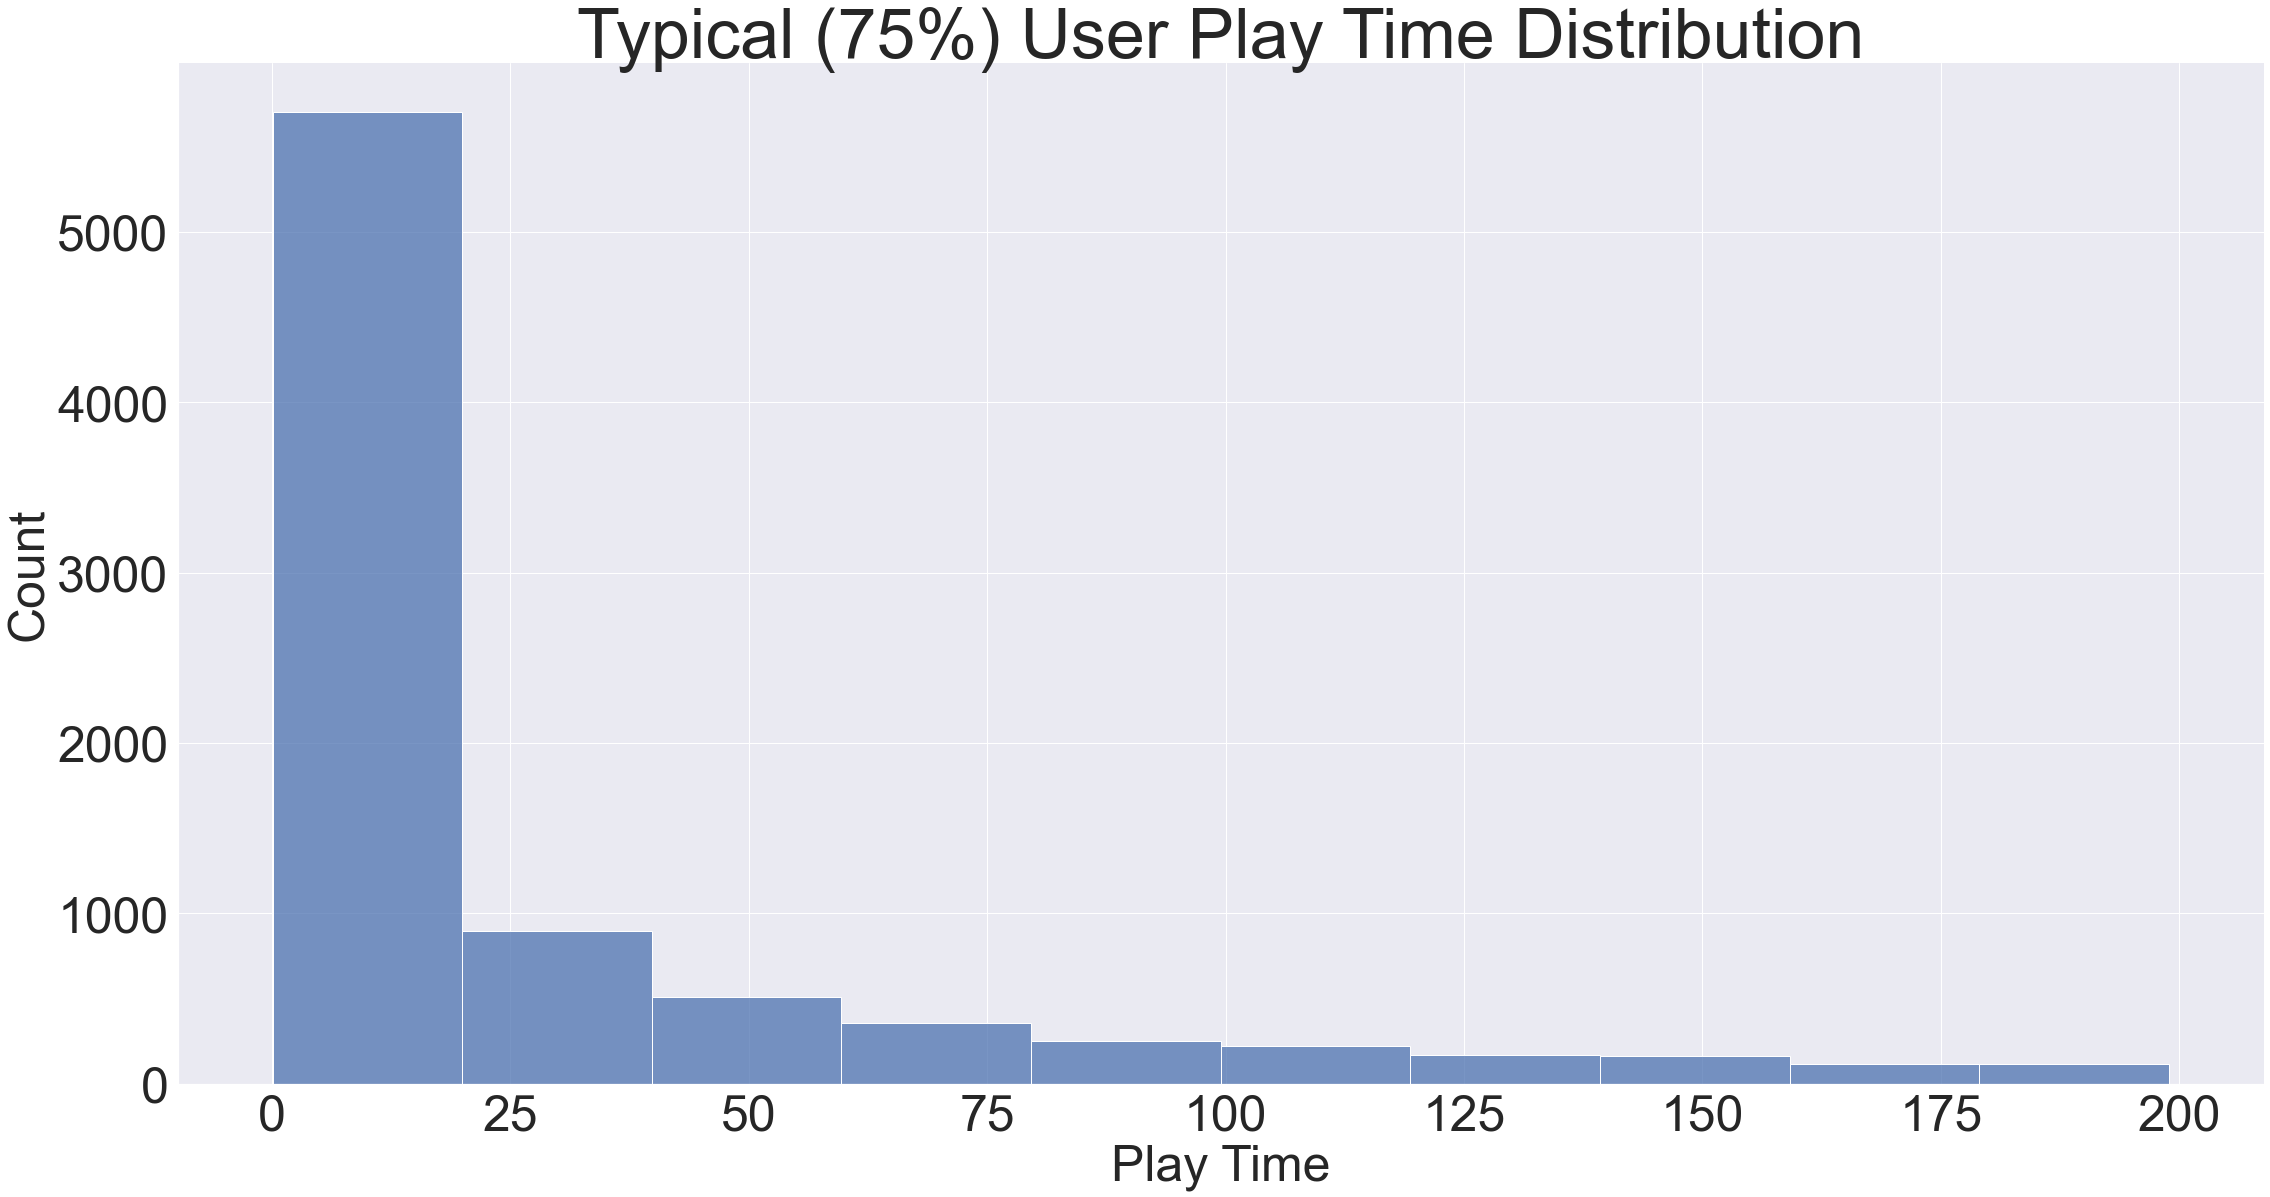

In [162]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=typ_users, x='play_time',bins=10, height=15, aspect=2)
plt.xlabel("Play Time", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("Typical (75%) User Play Time Distribution", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_usertime_typ.jpg', bbox_inches='tight', dpi=150);

### Distribution of Log Time

Converting the pay time distribution to a log distributions will bring the play time left skewed distribution into a normal distribution. This isn't necessarily relevant to the the recommendation system being devloped here, but just a demonstration for the sake of demonstration. At least, it is easier to count how many users are present in each bin compared to the non log distribution.

In [115]:
# Creat a column for the log of the per user play time
user_time['log_time'] = np.log(user_time['play_time'])

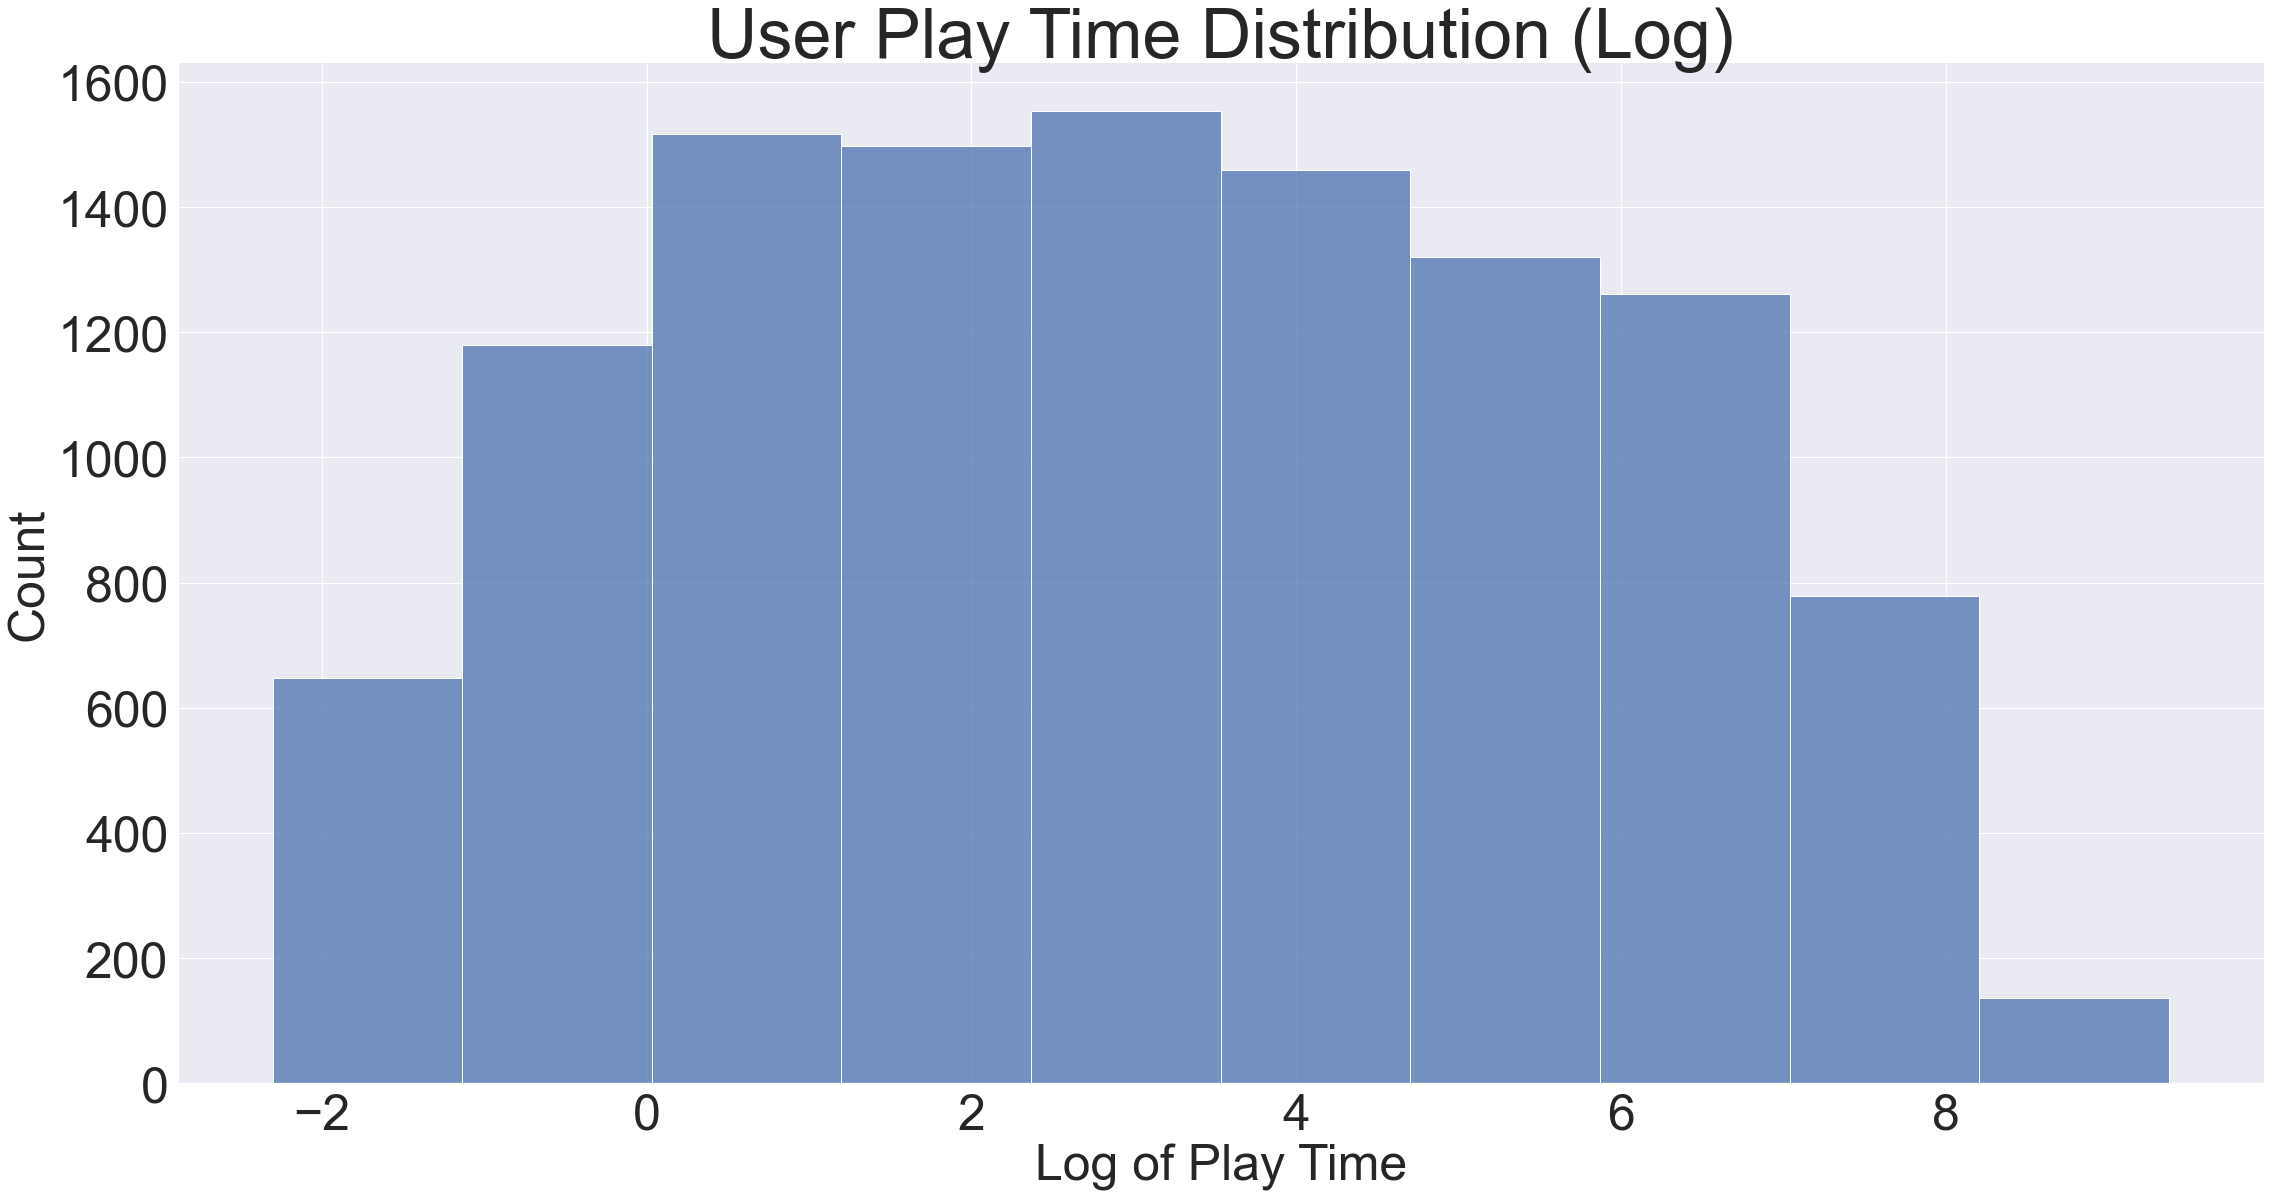

In [127]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=user_time, x='log_time',bins=10, height=15, aspect=2)
plt.xlabel("Log of Play Time", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("User Play Time Distribution (Log)", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_logtime.jpg', bbox_inches='tight', dpi=150);

### Log Time Statistics

In [123]:
user_time['log_time'].describe()

count    11350.000000
mean         3.057971
std          2.707674
min         -2.302585
25%          0.832909
50%          2.972972
75%          5.293179
max          9.371949
Name: log_time, dtype: float64

### Distribution of Total Purchases per User

In [135]:
# Count number of purchases per user
no_purchase = steam.drop(columns=['game','play_time']).groupby(['user']).sum().sort_values(by = 'purchase', ascending=False)
no_purchase.reset_index(inplace=True)
# Show top 20 only
no_purchase[:20]

,user,purchase
0,62990992,498.0
1,11403772,314.0
2,47457723,301.0
3,138941587,299.0
4,49893565,298.0
5,24469287,284.0
6,48798067,254.0
7,36546868,236.0
8,17530772,212.0
9,51557405,210.0


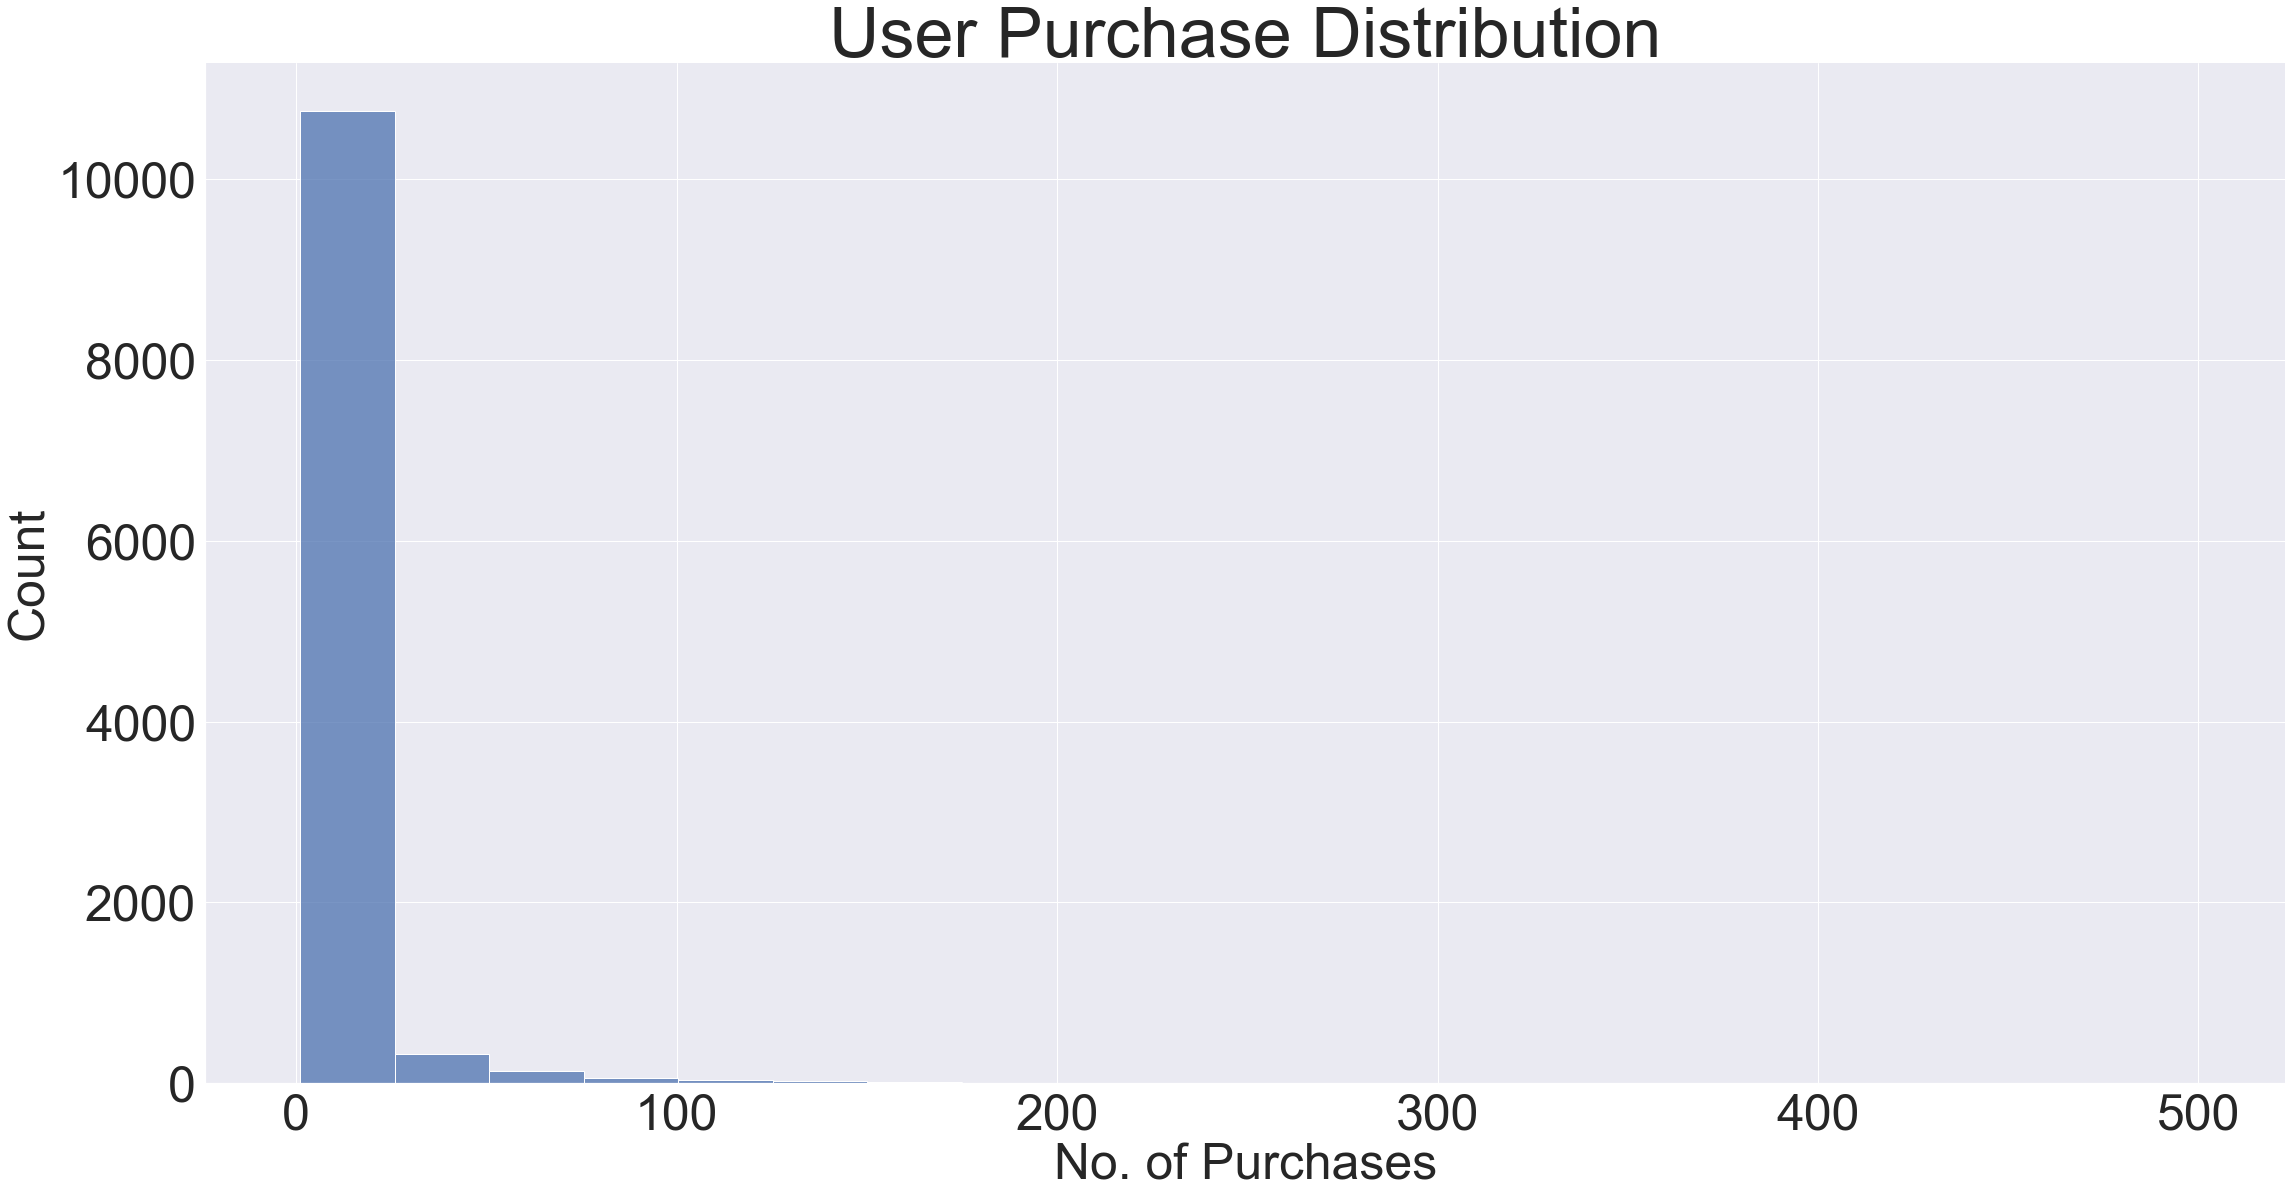

In [163]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=no_purchase, x='purchase',bins=20, height=15, aspect=2)
plt.xlabel("No. of Purchases", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("User Purchase Distribution", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_numpurchase.jpg', bbox_inches='tight', dpi=150);

### Checking for Purchase Quantity Outliers using Box Plot

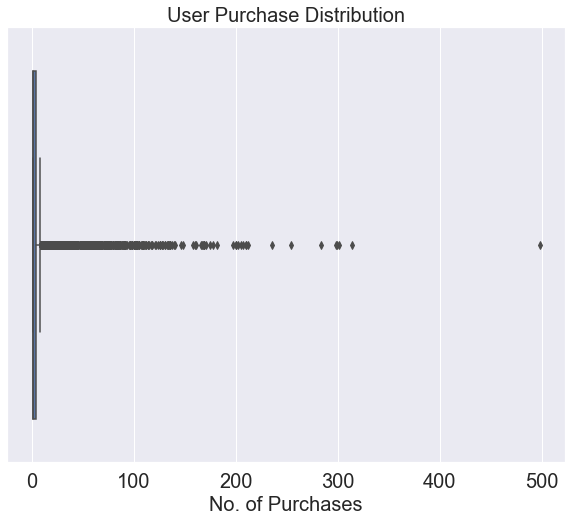

In [192]:
# Plot the distrubution 
sns.set()
fig=plt.figure(figsize=(10, 8))
sns.boxplot(data=no_purchase, x='purchase')
plt.xlabel("No. of Purchases", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("User Purchase Distribution", fontsize = 20);

#Saving the plot as an image
fig.savefig('images/box_numpurchase.jpg', bbox_inches='tight', dpi=150);

### Total Purchase Statistics

In [172]:
# Check statistics on purchases
no_purchase['purchase'].describe()

count    11350.000000
mean         6.236476
std         17.838111
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        498.000000
Name: purchase, dtype: float64

4 games! 75% users only own 4 games on Steam. One user has 498 purchased games. Wonder if they bought most on sale and are 'planning on playing them one day'.

### Distribution of Total Purchases per User (top 5%)

In [183]:
# Check what the quantile is at 90% since 75% is only 4 games
no_purchase['purchase'].quantile(q=0.95)

27.0

In [186]:
# Create dataframe for typical purchase distribution (top 10%)
top_purchases = no_purchase[no_purchase['purchase'] >= no_purchase['purchase'].quantile(q=0.95)]
top_purchases.head()

,user,purchase
0,62990992,498.0
1,11403772,314.0
2,47457723,301.0
3,138941587,299.0
4,49893565,298.0


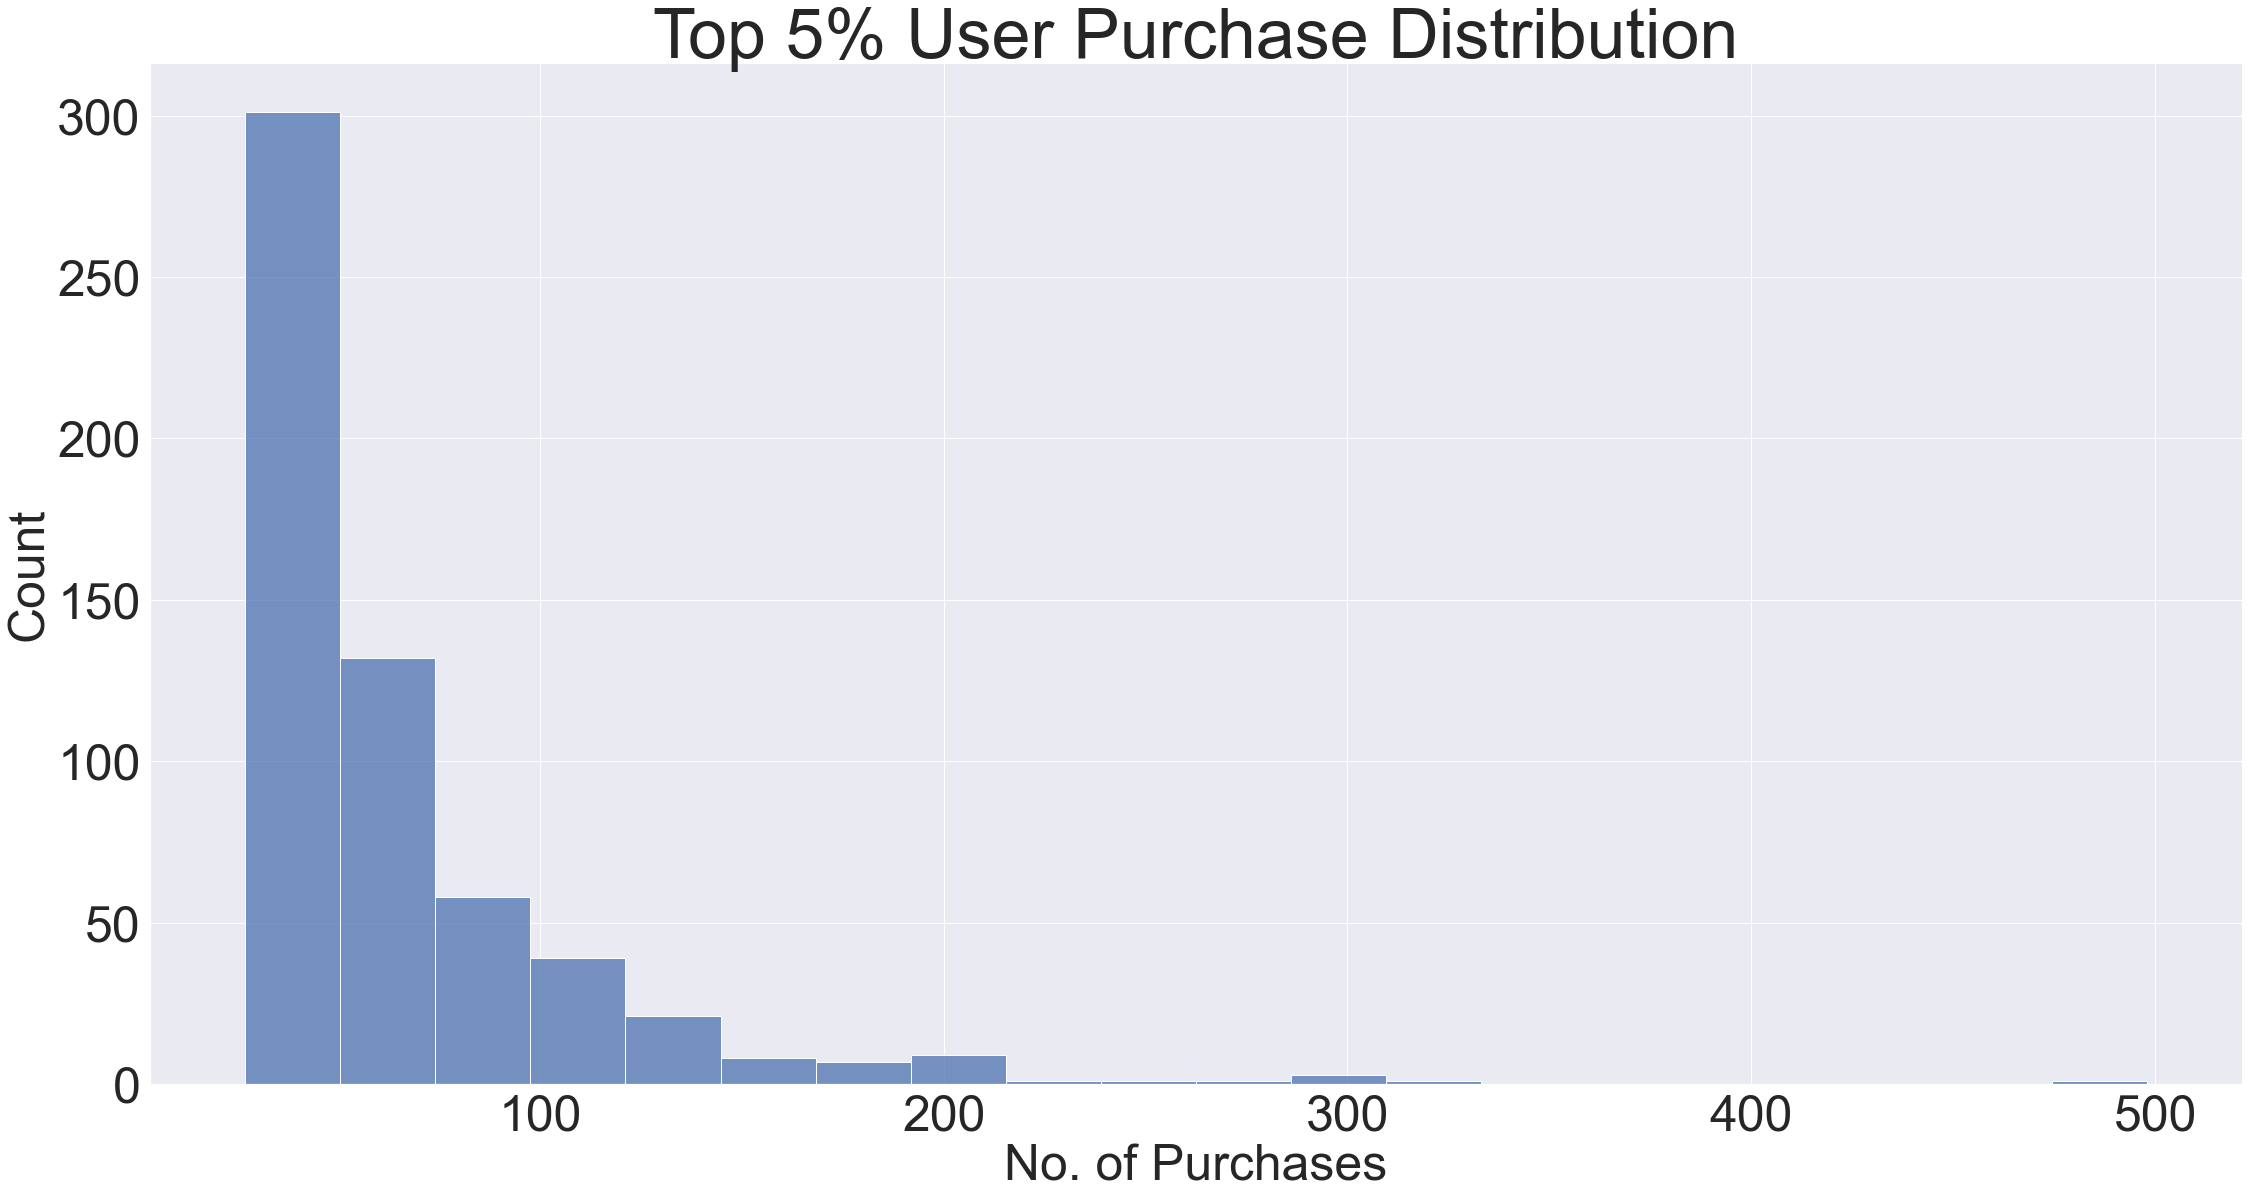

In [190]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=top_purchases, x='purchase',bins=20, height=15, aspect=2)
plt.xlabel("No. of Purchases", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("Top 5% User Purchase Distribution", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_numpurchase_top.jpg', bbox_inches='tight', dpi=150);

### Distribution of Total Purchases per User (bottom 95%)

In [189]:
# Create dataframe for typical purchase distribution (under 95%)
typ_purchases = no_purchase[no_purchase['purchase'] <= no_purchase['purchase'].quantile(q=0.95)]
typ_purchases.head()

,user,purchase
565,140408017,27.0
566,206014489,27.0
567,153076975,27.0
568,119310413,27.0
569,57368001,27.0


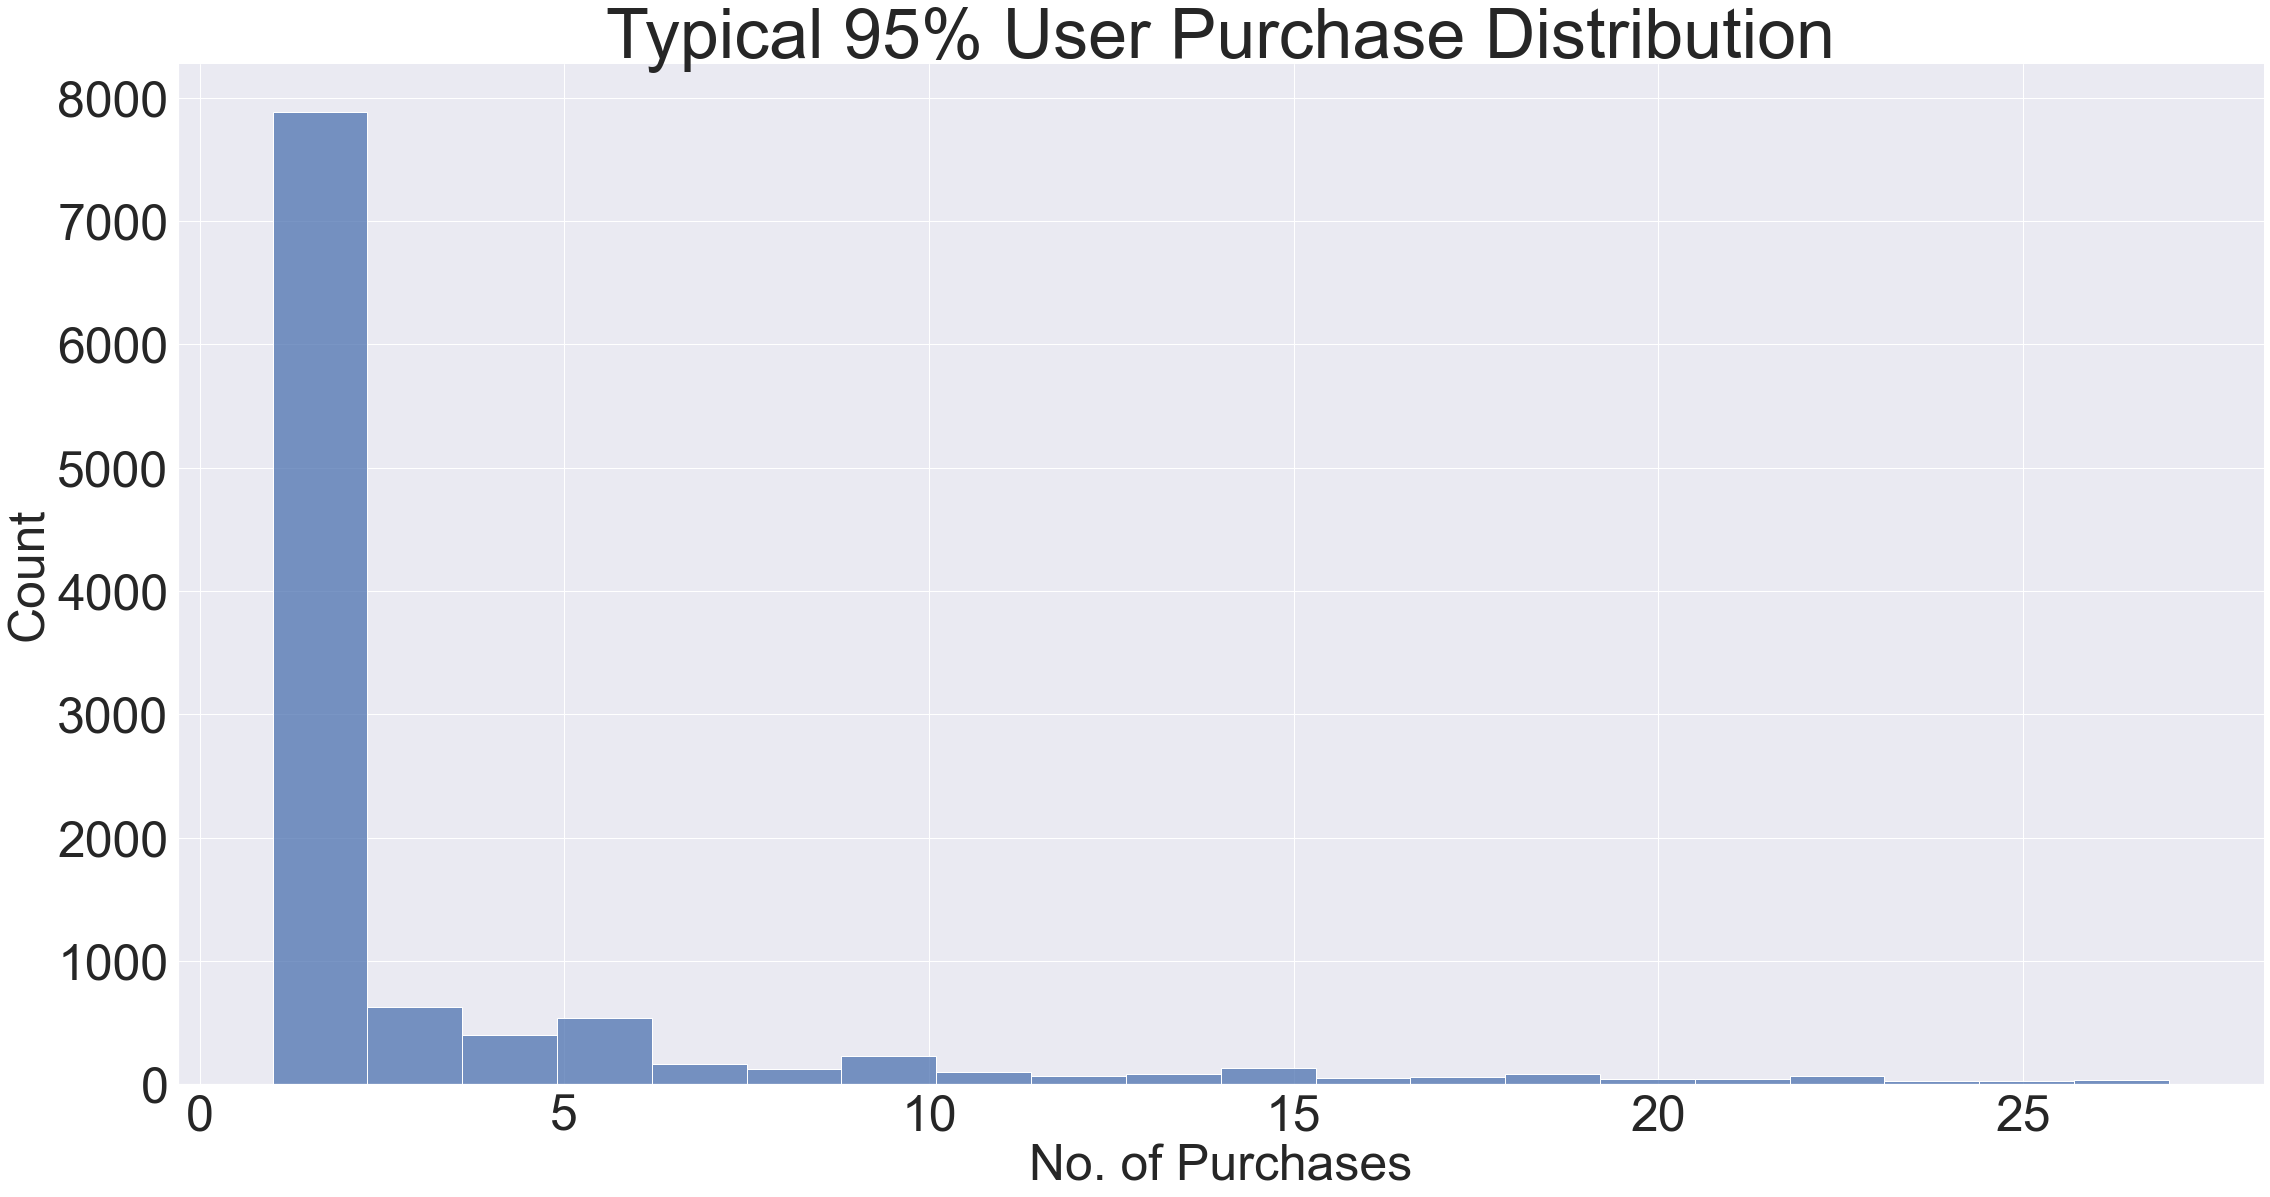

In [191]:
# Plot the distrubution 
sns.set()
fig=sns.displot(data=typ_purchases, x='purchase',bins=20, height=15, aspect=2)
plt.xlabel("No. of Purchases", fontsize = 50)
plt.xticks(fontsize=50)
plt.ylabel('Count', fontsize = 50)
plt.yticks(fontsize=50)
plt.title("Typical 95% User Purchase Distribution", fontsize = 70);

#Saving the plot as an image
fig.savefig('images/dist_numpurchase_top.jpg', bbox_inches='tight', dpi=150);

Recall 75% of all users in the dataset only have up to 4 games.

### What games do the most active users play? 

### What is the probability that a Dota 2 player also plays one of the other top 10 games?

### What is the probability that someone who has purchased over 4 games plays more than 20 hrs, 100hrs, 200hrs?

### What is the probability that Counter-Strike players also play one of the other top 10 games?

### How likely is it that a player in the top 25% of play time also owns more than 4 games, 10 games, 100 games?